<class 'dict'>
<class 'numpy.ndarray'>
(1, 256, 256, 3)
(256, 256, 3)
<class 'dict'>
<class 'numpy.ndarray'>
(1, 256, 256, 3)
(256, 256, 3)
<class 'dict'>
<class 'numpy.ndarray'>
(1, 256, 256, 3)
(256, 256, 3)
<class 'dict'>
<class 'numpy.ndarray'>
(1, 256, 256, 3)
(256, 256, 3)
<class 'dict'>
<class 'numpy.ndarray'>
(1, 256, 256, 3)
(256, 256, 3)


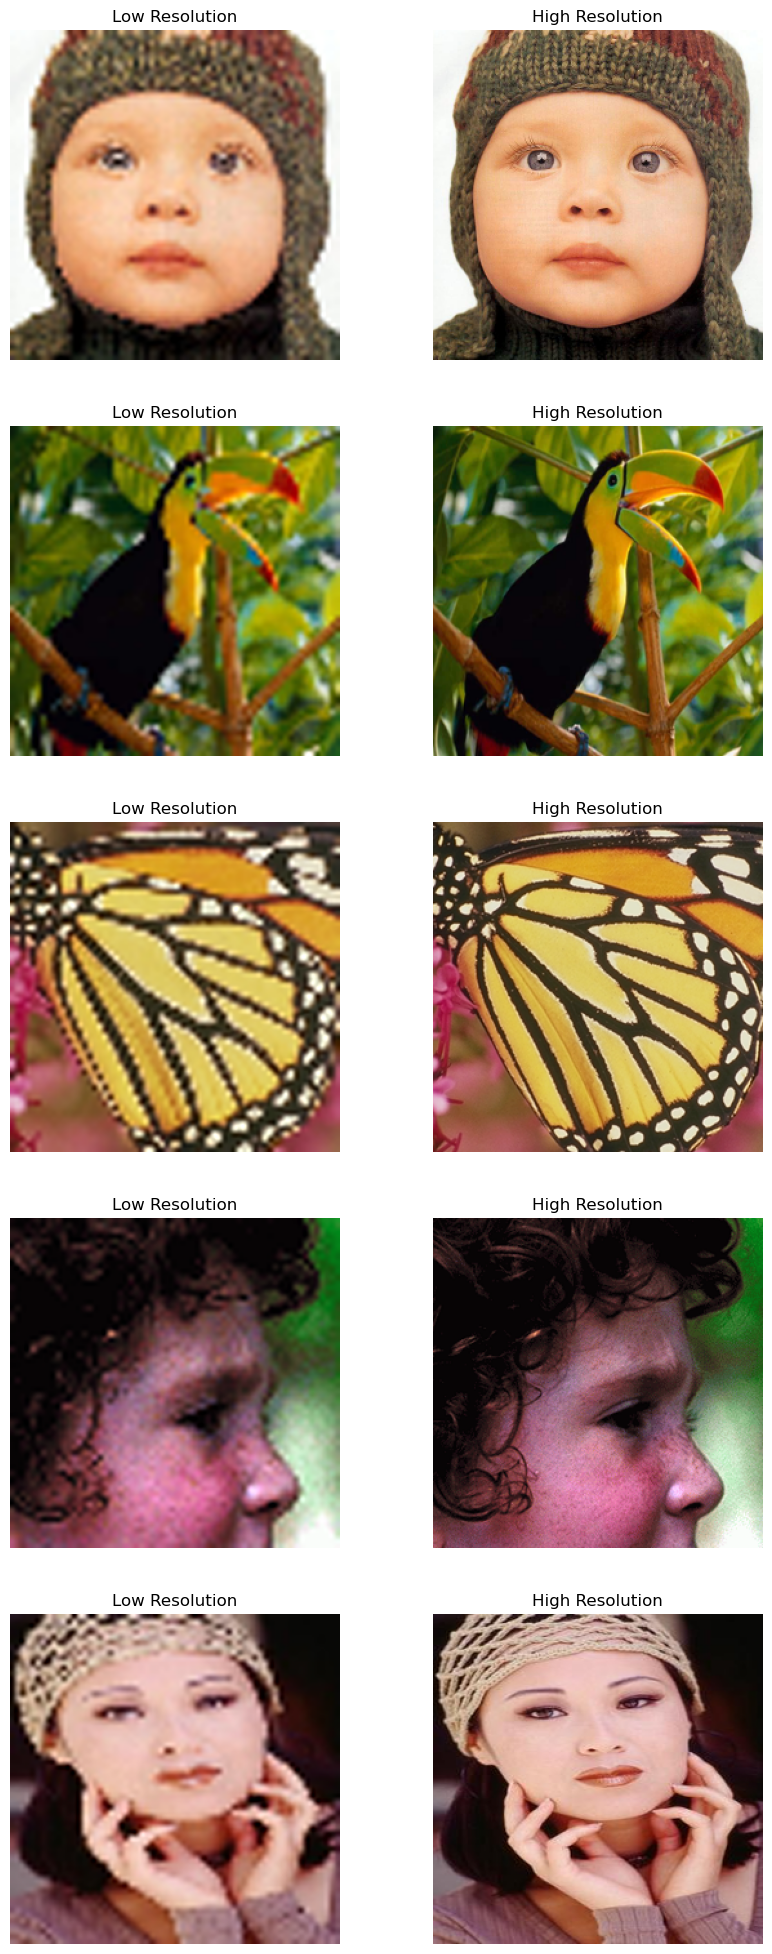

In [13]:
import os
import cv2
import numpy as np
from mindspore import dtype as mstype
from mindspore.dataset import GeneratorDataset
import mindspore.dataset.vision.c_transforms as vision
from mindspore.dataset.vision import Inter
import mindspore.dataset.transforms.c_transforms as C

import matplotlib.pyplot as plt

def image_generator(data_dir, scale=4):
    """生成器函数，读取指定目录的PNG文件，并生成低分辨率和高分辨率版本"""
    for img_name in os.listdir(data_dir):
        if img_name.lower().endswith('.png'):
            img_path = os.path.join(data_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换颜色空间为RGB
            
            # 高分辨率图像
            hr_img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
            
            # 低分辨率图像
            lr_img = cv2.resize(img, (256 // scale, 256 // scale), interpolation=cv2.INTER_CUBIC)
            lr_img = cv2.resize(lr_img, (256, 256), interpolation=cv2.INTER_CUBIC)
            #print(lr_img)
            yield (np.array(lr_img), np.array(hr_img))

def create_sr_dataset(data_dir, scale=4, batch_size=1):
    """使用GeneratorDataset创建超分辨率数据集"""
    # 转换操作
    # transform_operations = [
    #     vision.ToTensor(),
    #     C.TypeCast(mstype.float32)  # 数据类型转换
    # ]
    
    # 创建生成器数据集
    dataset = GeneratorDataset(source=image_generator(data_dir, scale),
                               column_names=['lr_image', 'hr_image'],
                               num_parallel_workers=1)
    
    # 应用转换操作
    # dataset = dataset.map(operations=transform_operations, input_columns=['lr_image'])
    # dataset = dataset.map(operations=transform_operations, input_columns=['hr_image'])
    


    # 批处理
    dataset = dataset.batch(batch_size, drop_remainder=True)

    return dataset

# 使用函数
data_dir = r"D:\allproject\set5\set5"  # 修改为你的数据路径
dataset = create_sr_dataset(data_dir, scale=4, batch_size=1)
#print(len(dataset))

def visualize_dataset(dataset, num_samples=5):
    """ 可视化数据集中的图像 """
    iterator = dataset.create_dict_iterator(output_numpy = True)  # 创建字典迭代器
    count = 0
    plt.figure(figsize=(10, num_samples * 5))
    
    for data in iterator:
        print(type(data))
        # 获取低分辨率和高分辨率图像
        lr_image = data['lr_image']
        hr_image = data['hr_image']
        print(type(data['lr_image']))
        print(data['lr_image'].shape)
        #print(lr_image)
        lr_image = np.squeeze(lr_image)
        hr_image = np.squeeze(hr_image)
        print(lr_image.shape)
       
        
        count += 1
        # 显示低分辨率图像
        plt.subplot(num_samples, 2, count * 2 - 1)
        plt.imshow(lr_image)
        plt.title("Low Resolution")
        plt.axis('off')
        
        # 显示高分辨率图像
        plt.subplot(num_samples, 2, count * 2)
        plt.imshow(hr_image)
        plt.title("High Resolution")
        plt.axis('off')

        if count == num_samples:
            break
    
    plt.show()

visualize_dataset(dataset, num_samples=6)

In [21]:
import os
import cv2
import numpy as np
from mindspore import dtype as mstype
from mindspore.dataset import GeneratorDataset
import mindspore.dataset.vision.c_transforms as vision
from mindspore.dataset.vision import Inter
import mindspore.dataset.transforms.c_transforms as C

import matplotlib.pyplot as plt

def image_generator(data_dir, scale=4):
    """生成器函数，读取指定目录的PNG文件，并生成低分辨率和高分辨率版本"""
    for img_name in os.listdir(data_dir):
        if img_name.lower().endswith('.png'):
            img_path = os.path.join(data_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换颜色空间为RGB
            
            # 高分辨率图像
            hr_img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
            
            # 低分辨率图像
            lr_img = cv2.resize(img, (256 // scale, 256 // scale), interpolation=cv2.INTER_CUBIC)
            lr_img = cv2.resize(lr_img, (256, 256), interpolation=cv2.INTER_CUBIC)
            
            # print(hr_img.dtype)
            # print(lr_img.dtype)
            lr =  np.array(lr_img).astype(np.float32)
            hr = np.array(hr_img).astype(np.float32)
            lr = np.transpose(lr, (2, 0, 1))
            hr = np.transpose(hr, (2, 0, 1))
            #print(lr.shape)
            
            yield (lr, hr)

def create_sr_dataset(data_dir, scale=4, batch_size=1):
    """使用GeneratorDataset创建超分辨率数据集"""
    # 转换操作
    # transform_operations = [
    #     vision.ToTensor(),
    #     C.TypeCast(mstype.float32)  # 数据类型转换
    # ]
    
    # 创建生成器数据集
    dataset = GeneratorDataset(lambda:image_generator(data_dir, scale),
                               column_names=["review", "label"],
                               num_parallel_workers=1)
    
    # 应用转换操作
    # dataset = dataset.map(operations=transform_operations, input_columns=['lr_image'])
    # dataset = dataset.map(operations=transform_operations, input_columns=['hr_image'])
    


    # 批处理
    dataset = dataset.batch(batch_size, drop_remainder=True)

    return dataset

# 使用函数
data_dir = r"C:\Users\19616\Set5\gt"  # 修改为你的数据路径
dataset = create_sr_dataset(data_dir, scale=4, batch_size=1)







import mindspore.nn as nn
import mindspore.ops as ops
from mindspore.common.initializer import TruncatedNormal



class SRCNN(nn.Cell):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, pad_mode='pad', padding=4)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 32, kernel_size=5, pad_mode='pad', padding=2)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(32, 3, kernel_size=5, pad_mode='pad', padding=2)

    def construct(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.conv3(x)
        print(x.shape)
        return x

from mindspore.train import Model
from mindspore.train.callback import LossMonitor, ModelCheckpoint, CheckpointConfig
import mindspore.dataset as ds

def train_model(model, dataset, epochs, lr=0.001):
    """训练模型的函数"""
    # 损失函数和优化器
    loss = nn.MSELoss(reduction='mean')
    optimizer = nn.Adam(params=model.trainable_params(), learning_rate=lr)
    
    # 配置模型
    model = Model(model, loss_fn=loss, optimizer=optimizer, metrics={'loss': nn.Loss()})

    # 设置模型保存配置
    config_ck = CheckpointConfig(save_checkpoint_steps=dataset.get_dataset_size(), keep_checkpoint_max=5)
    
    ckpoint_cb = ModelCheckpoint(prefix="SRCNN", directory="./srcnn_ckpts", config=config_ck)

    #print(len(dataset))
    # 训练模型
    model.train(epochs, dataset, callbacks=[LossMonitor(), ckpoint_cb])

# 实例化模型并训练
srcnn_model = SRCNN()
train_dataset = dataset  # 确保已正确设置路径和调用加载数据集函数
#data = next(train_dataset.create_dict_iterator())
# print(data["review"])
# print(data["label"])
#train_dataset = train_dataset.batch(1, drop_remainder=True)
#visualize_dataset(train_dataset, num_samples=1)
train_model(srcnn_model, train_dataset, epochs=30, lr=0.0001)


epoch: 1 step: 1, loss is 22086.712890625
epoch: 1 step: 2, loss is 18470.974609375
epoch: 1 step: 3, loss is 15354.5625
epoch: 1 step: 4, loss is 12574.4375
epoch: 1 step: 5, loss is 12490.1630859375
epoch: 1 step: 6, loss is 10106.380859375
epoch: 1 step: 7, loss is 8939.17578125
epoch: 1 step: 8, loss is 7413.76806640625
epoch: 1 step: 9, loss is 5025.5595703125
epoch: 1 step: 10, loss is 4075.695068359375
epoch: 1 step: 11, loss is 3009.893310546875
epoch: 1 step: 12, loss is 2714.636962890625
epoch: 1 step: 13, loss is 2377.35302734375
epoch: 1 step: 14, loss is 2211.317138671875
epoch: 1 step: 15, loss is 2259.633544921875
epoch: 1 step: 16, loss is 2186.74072265625
epoch: 1 step: 17, loss is 1920.5340576171875
epoch: 1 step: 18, loss is 1799.4844970703125
epoch: 1 step: 19, loss is 2062.599365234375
epoch: 1 step: 20, loss is 1654.5430908203125
epoch: 1 step: 21, loss is 1440.1656494140625
epoch: 1 step: 22, loss is 1324.0130615234375
epoch: 1 step: 23, loss is 1097.122802734375

In [28]:
from mindspore import context, Tensor
from mindspore.train import Model
from mindspore.common.initializer import TruncatedNormal
import mindspore.dataset as ds
import mindspore.dataset.transforms.c_transforms as C
import mindspore.dataset.vision.c_transforms as vision
from mindspore.train.serialization import load_checkpoint, load_param_into_net
import cv2
import numpy as np
from mindspore import Tensor


# 设定运行模式和设备
context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

# 加载模型
srcnn_model = SRCNN()
param_dict = load_checkpoint(r"C:\Users\19616\srcnn_ckpts\SRCNN_13-30_155.ckpt")
load_param_into_net(srcnn_model, param_dict)

# 创建Mindspore模型实例，用于推断
model = Model(srcnn_model)

# 假设你已经有了一个Tensor类型的低分辨率图像
# 例如：
def load_image_to_tensor(image_path):
    """加载图像并转换为Mindspore Tensor"""
    # 使用OpenCV读取图像
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 将BGR转换为RGB格式

    # 调整图像大小（如果需要）
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)  # 确保图像是256x256大小

    # 归一化处理，将数据范围从[0, 255]转换为[0, 1]
    img = img.astype(np.float32) /255

    # 调整维度顺序为(CHW)
    img = np.transpose(img, (2, 0, 1))
    img = np.expand_dims(img, axis=0)
    # 转换为Mindspore Tensor
    tensor = Tensor(img)

   
            
            

    return tensor
# lr_image = Tensor(np.random.randn(1, 3, 256, 256), mindspore.float32)  # 随机数据作为示例
image_path = r'C:\Users\19616\Set5\gt\baby.png'  # 替换为实际的图像路径
lr_image = load_image_to_tensor(image_path)
# 使用模型进行推断

sr_image = model.predict(lr_image)

# 将输出转换回可用的格式，例如numpy数组
sr_image = sr_image.asnumpy()
print(lr_image.shape)
print(sr_image.shape)


(1, 3, 256, 256)
(1, 3, 256, 256)


In [34]:
import numpy as np
from skimage import metrics

def calculate_psnr_ssim(image1, image2):
    """计算PSNR和SSIM指标"""
    # 确保图像数据是在[0, 1]或者[0, 255]范围内
    if image1.max() > 1:
        image1 = image1 / 255.0
    if image2.max() > 1:
        image2 = image2 / 255.0
        
    image1 = image1.squeeze()
    image2 = image2.squeeze()
    # 转换维度从(1, 3, 256, 256)到(256, 256, 3)
    image1 = np.transpose(image1, (1, 2, 0))
    image2 = np.transpose(image2, (1, 2, 0))
    print(image1.shape)
    print(image2.shape)

    #image1是tensor
    image1 = image1.asnumpy()
    
    # 计算PSNR
    psnr = metrics.peak_signal_noise_ratio(image1, image2)

    # 计算SSIM
    gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
    ssim = metrics.structural_similarity(gray1, gray2,data_range=255)
    return psnr, ssim

# 假设你有两个图像tensor1和tensor2
# 例如：
# tensor1 = np.random.rand(1, 3, 256, 256) * 255
# tensor2 = np.random.rand(1, 3, 256, 256) * 255

print(lr_image.shape)
print(sr_image.shape)

psnr, ssim = calculate_psnr_ssim(lr_image, sr_image)
print("PSNR:", psnr)
print("SSIM:", ssim)


(1, 3, 256, 256)
(1, 3, 256, 256)
(256, 256, 3)
(256, 256, 3)
PSNR: 4.24341149717702
SSIM: 0.9478230583543777


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 3, 256, 256)
(1, 3, 256, 256)


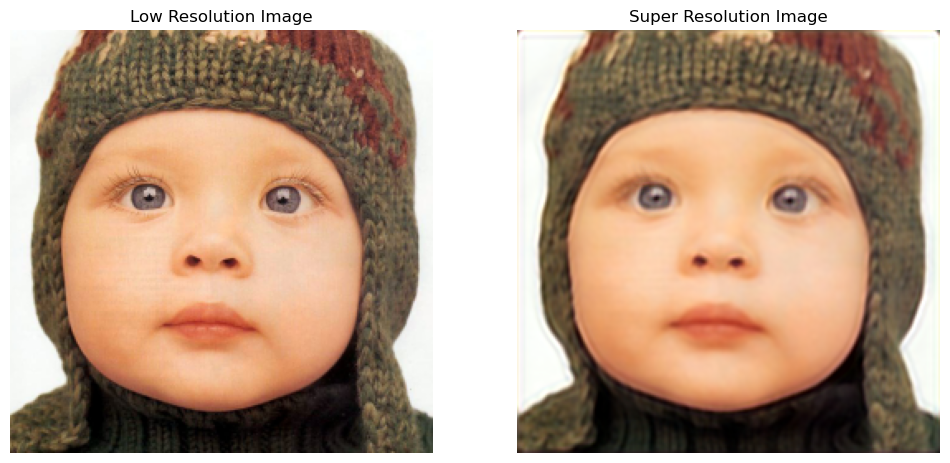

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(lr_image, sr_image):
    """展示低分辨率和超分辨率图像"""
    
    # 检查是否为NumPy数组，如果是Tensor，则转换
    if isinstance(lr_image, Tensor):
        lr_image = lr_image.asnumpy()
    if isinstance(sr_image, Tensor):
        sr_image = sr_image.asnumpy()
    
    # 转换图像维度从(C, H, W)到(H, W, C)
    lr_image = np.transpose(lr_image, (1, 2, 0))
    sr_image = np.transpose(sr_image, (1, 2, 0))
    
    # 将数据范围调整回[0, 1]如果图像数据最大值大于1
    

    
    
    # 创建一个画布来展示图像
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(lr_image)
    plt.title('Low Resolution Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sr_image)
    plt.title('Super Resolution Image')
    plt.axis('off')

    plt.show()

# 假设lr_image和sr_image已经是正确的NumPy数组或Mindspore的Tensor类型
# 示例用法，传入实际的图像数据：
print(lr_image.shape)
print(sr_image.shape)
show1 = lr_image.squeeze()
show2 = sr_image.squeeze()
show_images(show1, show2)
